ASSUMPTIONS:

- A new passenger appears on a random floor at each time step until all new passengers have been added to the simulation
- The passenger has a destination floor but cannot make any requests
- The elevator stops at every floor, picking up and dropping off passengers
- The elevator will not pick up a passenger if it has reached its passenger capacity. The passenger will have to wait for the elevator to return with more space

BUILDING CLASS

- Initializes the building variables
- Adds a random passenger at each timestep to the simulation
- Checks if all passengers have been transported
- Runs simulation codes
- Collects data for the two metrics

PASSENGER CLASS

- Initializes the passenger variables
- Changes passenger status from waiting to on elevator
- Changes passenger status to leaving elevator 

ELEVATOR CLASS

- Initializes the elevator variables
- Moves the elevator which stops at every floor
- Picks up passengers at each floor
- Drops off passengers at each floor

STRATEGY COMPARISON METRICS

- The average time it takes for the elevator to complete all journeys (simulation time)
- The distribution of journey time for all passengers (histogram)
- The line graph showing the mean time for simulation/elevator time with varying building heights (from 10 to 100, step by 10)
- The line graph showing the mean time for simulation/elevator time with varying number of passengers (from 10 to 100, step by 10)
- The Boxplot showing the distribution of journey time for all passengers with varying building heights (from 10 to 100, step by 10)
- The Boxplot showing the distribution of journey time for all passengers with varying number of passengers (from 10 to 100, step by 10)

In [0]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import random

In [0]:
class Elevator():
  
  def __init__(self, max_floor, capacity = None, current_floor = 1, n_people = 0, going_up = True, verbose = False):
    """
    Initialize the elevator object
    Attributes:
    - capacity (int): maximum number of people the elevator can take
    - max_floor (int): the top floor that the elevator reaches
    - current_floor (int, default: 0): the floor that the elevator is currently on
    - n_people (int, default: 0): the number of people currently in the elevator
    - going_up (boolean, default: True): whether the elevator is going up or down
    - verbose (boolean, default: False): choose True for the print statement at each floor the elevator stops at
    
    """
    ## user input elevator capacity
    if capacity == None:
      capacity = input("What is the passenger capacity of the elevator? (integer)")
    self.capacity = capacity 
    ## due to weight regulations. we chose to measure this by number of passengers
    ## instead of sum weight because this way is simpler.
    self.max_floor = max_floor
    self.current_floor = current_floor
    self.n_people = n_people 
    self.going_up = going_up
    self.verbose = verbose
    
  def moveto(self):
    if self.current_floor == 1:
        self.going_up = True ## elevator cannot go below the bottom floor
    elif self.current_floor == self.max_floor:
        self.going_up = False ## elevator cannot go above top floor
    if self.going_up == True:
        self.current_floor += 1 ## if we're going up, we increase the current floor by 1
    else:
      self.current_floor -= 1 ## and vice versa
    if self.verbose == True:
      print("elevator moves to floor", self.current_floor)

  def pickup(self):
    if self.n_people + 1 <= self.capacity: ## we can't take more passengers if
      ## we are already at capacity
      self.n_people += 1
      return True
    return False
   
  def dropoff(self):
    self.n_people -= 1 ## dropping off a person at their destination floor
    ## decreases number of people in elevator by 1
    
class Building():
  ## this class describes more global aspects of the simulation

  def __init__(self, num_floor = None, num_pass = None, verbose = False):
    
    """
    Initialize the building object
    Attributes:
    - num_floor(int): similar to max_floor, this attribute tells us the number of floors in the building
    - n_people(int): keeps track of how many passengers we have initialized
    - num_pass(int): this attribute gives us the number of people in our simulation
    - time(int): we will track how long our entire simulation takes
    - passengers(list of objects): list of all the people in the simulation
    - finished_transport(boolean, default = False): turns to True when we have transported everyone
    - verbose (boolean, default: False): choose True for the print statements describing the simulation
    """
    
    ## user input for the number of floors in the building 
    if num_floor == None:
      num_floor = input("How many floors does the building have? (integer)")
      
    ## user input for the number of passengers in the simulation
    if num_pass == None:
      num_pass = input("How many passengers will use the elevator in this simulation? (integer)")
      
    self.num_floor = num_floor  
    self.n_people = 0 
    self.num_pass=num_pass  
    self.time=0 
    self.passengers = []  
    self.finished_transport = False
    self.verbose = verbose
    
  def add_passenger(self): ## here we initialize passengers to be picked up
     if self.n_people<self.num_pass: ## stops when we have initialized the maximum number of passenger requests in the current simulation       
        current_floor, destinationfloor = random.sample(range(1, self.num_floor+1), 2) #initialize random initial and destination floor for the passenger
        self.passengers.append(Passenger(current_floor, destinationfloor, -1)) ## adds the new passenger to our passenger list
        self.n_people+=1 ## increases count of initialized passengers
      
  def check_finished(self): ## repeatedly checks if the simulation is finished
    complete = True ## assume True until shown otherwise every time
    for i in self.passengers: ## for every passenger
      if i.waiting!=0: ## if they have not been dropped off at their destination
        complete = False ## the simulation is not complete
    self.finished_transport = complete ## however, if every passenger has been
    ## dropped off at their desination, we return complete = True
    
  def start_simulation(self):
    elevator = Elevator(self.num_floor, 10, verbose=self.verbose)
    
    if self.verbose == True:
      print("Building has {} floors".format(building.num_floor))
      print("We will transport a total of {} passengers in this simulation.".format(building.num_pass))
      print("At each of the first {} time steps, we will add a single passenger.".format(building.num_pass) + "\n")  

    while self.finished_transport==False:
      elevator.moveto()
      for i in self.passengers:
        if i.waiting!=0:
          i.time+=2 ## 2 seconds at each timestep (individual journey time)
        if i.waiting==-1 and i.origin==elevator.current_floor:
          if elevator.pickup() == True:
            i.change_state()
        if i.waiting==1 and i.destination==elevator.current_floor:
          elevator.dropoff()
          i.leave_elevator()
      self.add_passenger()
      self.check_finished()
      self.time+= 2 ## 2 seconds at each timestep (total journey time)
    
    if self.verbose == True:
      print("\nElevator has transported all passengers to their destinations after {} floor changes\n".format(building.time/2))
    pasjourney = [passenger.time for passenger in self.passengers]
    return pasjourney, self.time
    
    
class Passenger():
  ## this class describes each individual passenger
  def __init__(self, origin,  destination, wait):
    """
    Initialize the passenger object
    Attributes:
    - origin(int): where the passenger calls the elevator
    - waiting(int): -1 if the passenger is waiting to be picked up, 1 if the passenger has been picked up, or 0 if the passenger has been dropped off
    - destination(int): passenger's destination floor
    - time(int): tracks the amount of time it takes for the passenger to arrive at their destination floor from the time of initialization (when they 
    requested the elevator)
    """
    self.origin = origin
    self.waiting = wait
    self.destination = destination 
    self.time = 0
  
  def change_state(self): ## changes the waiting state of the passenger
    ## -1 is waiting, 1 is on elevator
    self.waiting = self.waiting * -1
    
  def leave_elevator(self):
      self.waiting = 0 ## once the passenger has been dropped off, their waiting
      ## state = 0
      

building = Building(10, 10, True) ## initialize Building with 10 floors and 10 passengers
building.start_simulation()

Building has 10 floors
We will transport a total of 10 passengers in this simulation.
At each of the first 10 time steps, we will add a single passenger.

elevator moves to floor 2
elevator moves to floor 3
elevator moves to floor 4
elevator moves to floor 5
elevator moves to floor 6
elevator moves to floor 7
elevator moves to floor 8
elevator moves to floor 9
elevator moves to floor 10
elevator moves to floor 9
elevator moves to floor 8
elevator moves to floor 7
elevator moves to floor 6
elevator moves to floor 5
elevator moves to floor 4
elevator moves to floor 3
elevator moves to floor 2
elevator moves to floor 1
elevator moves to floor 2
elevator moves to floor 3
elevator moves to floor 4
elevator moves to floor 5
elevator moves to floor 6
elevator moves to floor 7
elevator moves to floor 8
elevator moves to floor 9
elevator moves to floor 10
elevator moves to floor 9
elevator moves to floor 8
elevator moves to floor 7

Elevator has transported all passengers to their destinations 

([44, 28, 38, 18, 32, 28, 26, 18, 42, 34], 60)

the mean elevator simulation time for this strategy is:  137.42


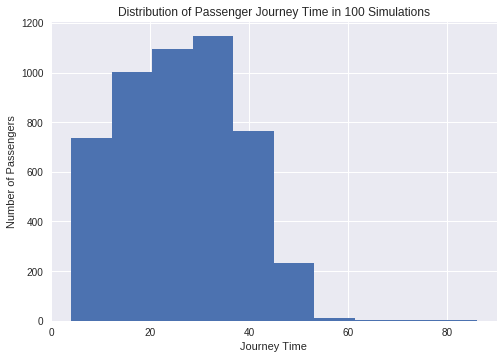

In [0]:
n_simulation = 100
alljourney = []
clocklst = []
for e in range(n_simulation):
  building = Building(10, 50)
  pasjourney, clock = building.start_simulation()
  alljourney.extend(pasjourney)
  clocklst.append(clock)
      
plt.hist(alljourney)
plt.xlabel("Journey Time")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passenger Journey Time in 100 Simulations")

print("the mean elevator simulation time for this strategy is: ", np.mean(clocklst))

In [0]:
def multisimulation(numfloors, n_people, n_simulation):
  '''Function which runs the simulation n times with a fixed number of floors and passengers'''
  
  clocklst = [] ## list of full runtimes for each simulation
  alljourney = [] ## list of passenger journey times for each simulation

  for i in range(n_simulation):
    building = Building(numfloors, n_people) ## one simulation
    pasjourney, clock = building.start_simulation() ## passenger journey times and runtime of simulation
    clocklst.append(clock)
    alljourney.extend(pasjourney)
    
  return np.mean(clocklst), alljourney

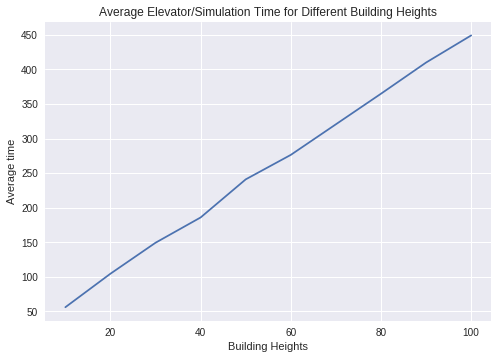

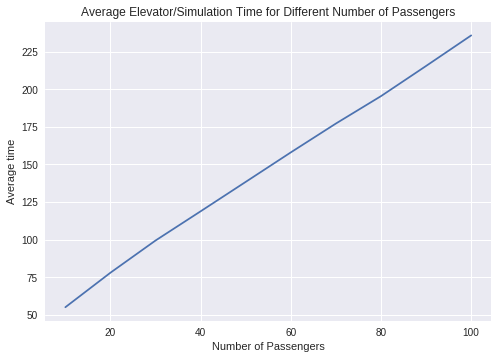

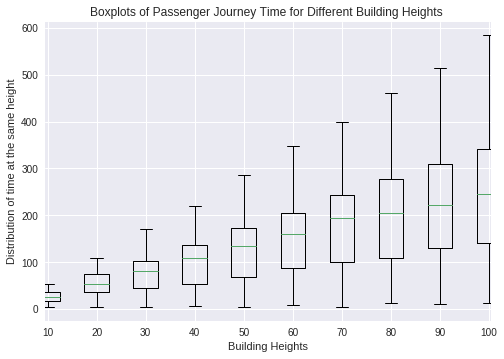

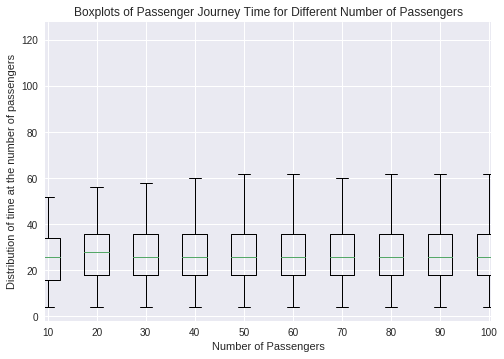

In [0]:
mean_by_height = [] ## mean of runtime from numfloors
mean_by_Npeople = [] ## mean of runtime from numpassengers
journey_by_height = [] ## journey times by numfloors
journey_by_Npeople = [] ## journey times by numpassengers

for i in range(10, 101, 10):
  '''Running the multisimulation for 10 to 100 floors (increasing by 10 each time), and passengers'''
  
  clock, journey = multisimulation(i, 10, 100)
  mean_by_height.append(clock)
  journey_by_height.append(journey)
    
  clock2, journey2 = multisimulation(10, i, 100)
  mean_by_Npeople.append(clock2)
  journey_by_Npeople.append(journey2)
  
## Line graph for average simulation time for different building heights
x_axis = range(10, 101, 10)
plt.plot(x_axis, mean_by_height)
plt.title('Average Elevator/Simulation Time for Different Building Heights')
plt.xlabel('Building Heights')
plt.ylabel('Average time')
plt.show()


## Line graph for average simulation time for different number of passengers
plt.title('Average Elevator/Simulation Time for Different Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Average time')
plt.plot(x_axis, mean_by_Npeople)
plt.show()


## Boxplot of passenger journey time for different building heights
plt.title('Boxplots of Passenger Journey Time for Different Building Heights ')
plt.xlabel('Building Heights')
plt.ylabel('Distribution of time at the same height')
plt.boxplot(x = journey_by_height, positions = x_axis, widths = 5)
plt.show()


## Boxplot of passenger journey time for different number of passengers
plt.title('Boxplots of Passenger Journey Time for Different Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Distribution of time at the number of passengers')
plt.boxplot(x = journey_by_Npeople, positions = x_axis, widths = 5)
plt.show()